<a href="https://colab.research.google.com/github/Sachitha03/Iris-Flower-Classification/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA LOADING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
read_data = pd.read_csv('/content/drive/MyDrive/IRIS.csv')
read_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EXPLORATORY DATA ANALYSIS

<ipython-input-55-859063cda5ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal_width', data=read_data, inner=None, linewidth=1.5, palette=color_palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


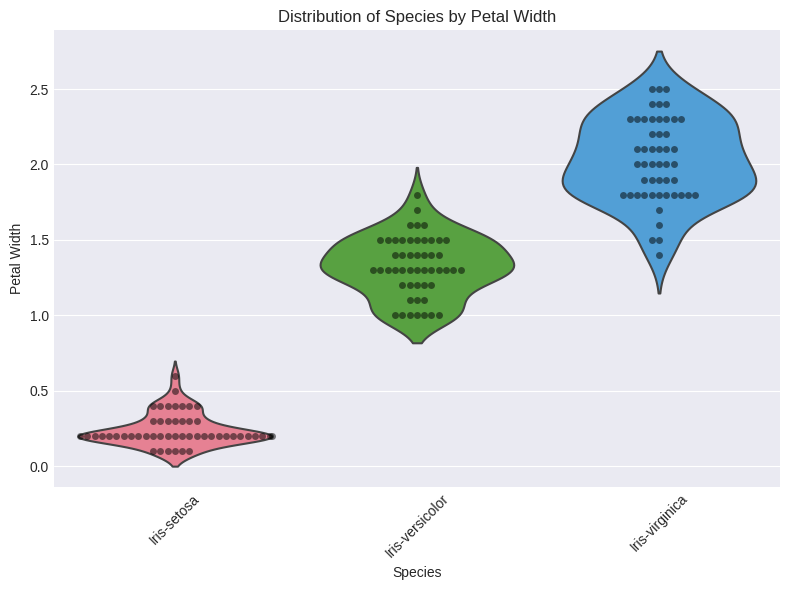

In [ ]:
color_palette = 'husl'


plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='petal_width', data=read_data, inner=None, linewidth=1.5, palette=color_palette)
sns.swarmplot(x='species', y='petal_width', data=read_data, color='k', alpha=0.5)
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Distribution of Species by Petal Width')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
read_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# DATA PREPROCESSING

In [ ]:
read_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
missing_values = read_data.isnull().sum()

print("Missing values per column:")
print(missing_values)

total_missing_values = missing_values.sum()
print(f"Total missing values: {total_missing_values}")

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Total missing values: 0


In [ ]:
initial_rows = read_data.shape[0]

read_data.drop_duplicates(inplace=True)

rows_after_drop = read_data.shape[0]

num_dropped = initial_rows - rows_after_drop
print(f"Number of dropped duplicates: {num_dropped}")




Number of dropped duplicates: 3


In [ ]:
print(f"Total number of rows left: { rows_after_drop}")

Total number of rows left: 147


In [ ]:
print("\nDataset information:")
print(read_data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB
None


# DATA VISUALIZATION

<Figure size 1200x600 with 0 Axes>

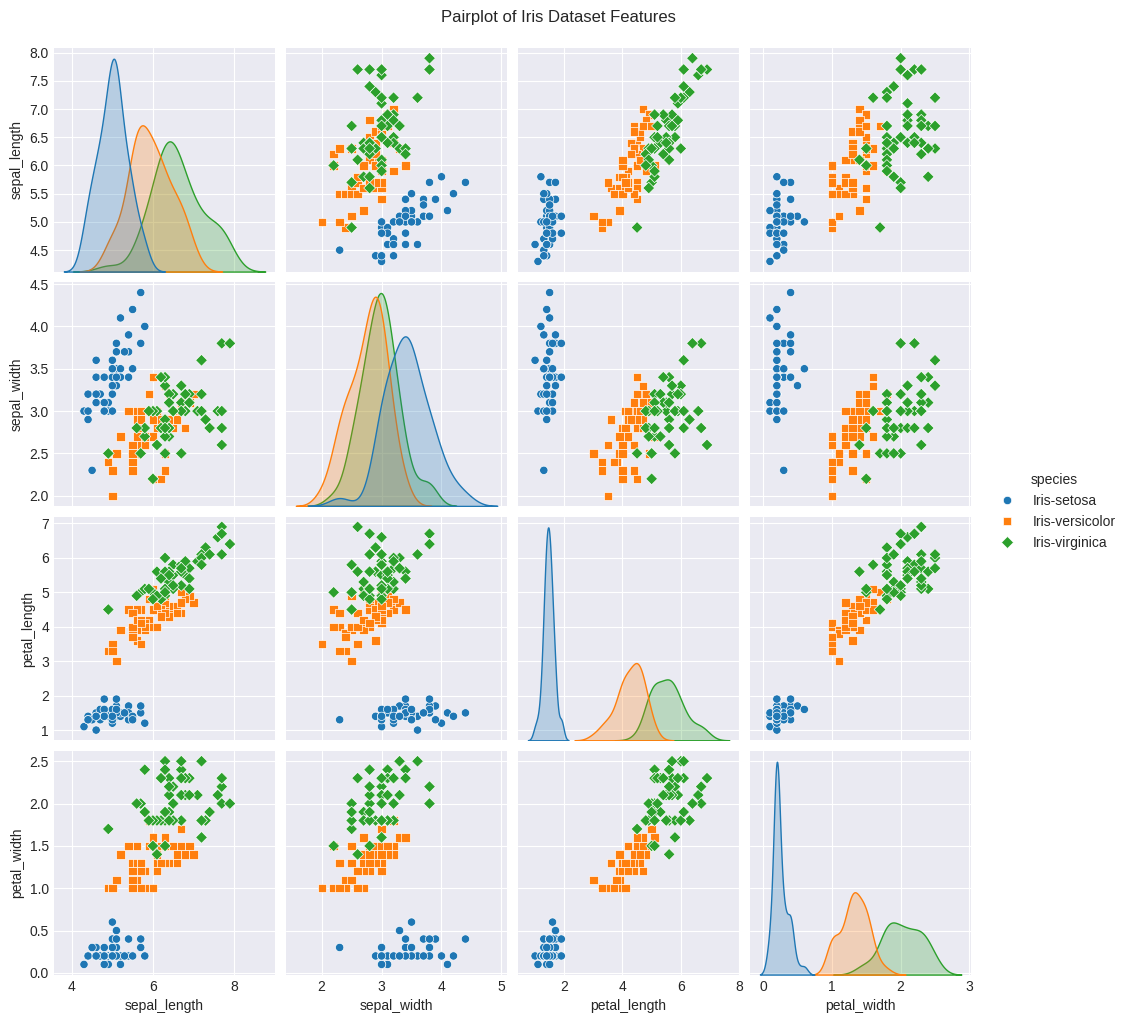

In [ ]:
plt.figure(figsize=(12, 6))
sns.pairplot(read_data, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)
plt.show()



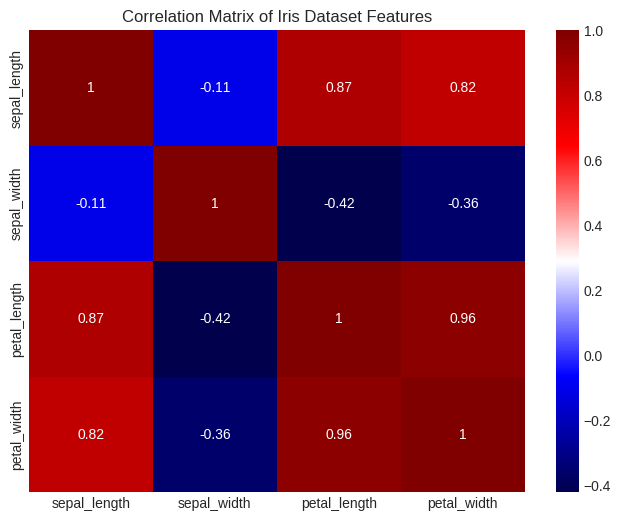

In [ ]:
numeric_data = read_data.drop('species', axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='seismic')
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()


# FEATURE ENGINEERING

In [ ]:
from tabulate import tabulate

data_encoded = pd.get_dummies(read_data, columns=['species'])

print("Encoded dataset:")
print(tabulate(data_encoded.head(), headers='keys', tablefmt='psql'))


Encoded dataset:
+----+----------------+---------------+----------------+---------------+-----------------------+---------------------------+--------------------------+
|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species_Iris-setosa   | species_Iris-versicolor   | species_Iris-virginica   |
|----+----------------+---------------+----------------+---------------+-----------------------+---------------------------+--------------------------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | True                  | False                     | False                    |
|  1 |            4.9 |           3   |            1.4 |           0.2 | True                  | False                     | False                    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | True                  | False                     | False                    |
|  3 |            4.6 |           3.1 |            1.5 |           0.2 

<ipython-input-65-7f84f626fde2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_encoded[column], label=column, shade=True)
<ipython-input-65-7f84f626fde2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_encoded[column], label=column, shade=True)
<ipython-input-65-7f84f626fde2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_encoded[column], label=column, shade=True)
<ipython-input-65-7f84f626fde2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_encoded[column], label=column, 

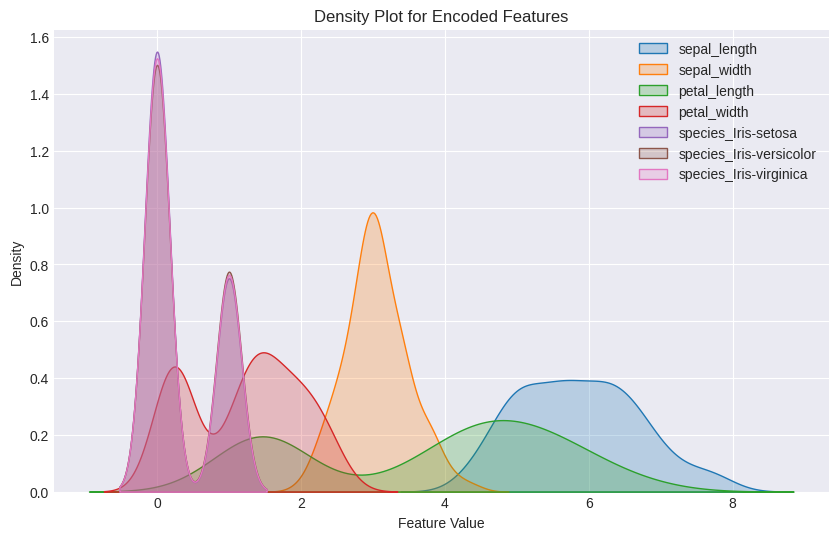

In [ ]:
plt.figure(figsize=(10, 6))
for column in data_encoded.columns:
    sns.kdeplot(data_encoded[column], label=column, shade=True)

plt.title('Density Plot for Encoded Features')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()
plt.show()


# MODEL BUILDING AND EVALUATION

SPLITTING DATASET INTO TRAINING AND TESTING SETS

In [ ]:
from sklearn.model_selection import train_test_split

X = read_data.drop('species', axis=1)
y = read_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


print("Training set - Features: ", X_train.shape, "Labels: ", y_train.shape)
print("Testing set - Features: ", X_test.shape, "Labels: ", y_test.shape)


Training set - Features:  (117, 4) Labels:  (117,)
Testing set - Features:  (30, 4) Labels:  (30,)


**TRAINING MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = read_data.drop('species', axis=1)
y = read_data['species']

rf = RandomForestClassifier(n_estimators=100, random_state=45)
rf.fit(X, y)

feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print("Feature importances:")
print(feature_importances_df)

selected_features = feature_importances_df['Feature'][:3]
X['petal_ratio'] = X['petal_length'] / X['petal_width']
X_selected = X[selected_features]
rf_selected = RandomForestClassifier(n_estimators=100, random_state=45)
rf_selected.fit(X_selected, y)

y_pred = rf_selected.predict(X_selected)

accuracy = accuracy_score(y, y_pred)
print("\nAccuracy with selected features:", accuracy)


Feature importances:
        Feature  Importance
3   petal_width    0.455507
2  petal_length    0.437246
0  sepal_length    0.088296
1   sepal_width    0.018951

Accuracy with selected features: 1.0


<ipython-input-68-f1c8227af628>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Feature', data=data_sorted, palette='viridis')


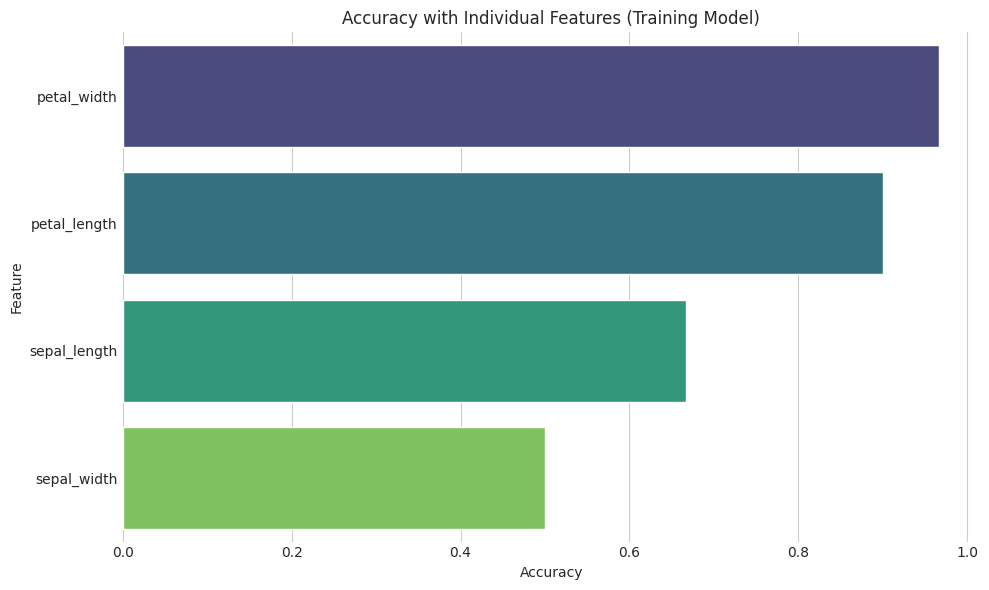

In [ ]:
num_features_list = []
accuracies = []

feature_names = X_train.columns

for feature in feature_names:
    X_train_selected = X_train[[feature]]
    X_test_selected = X_test[[feature]]

    rf_selected = RandomForestClassifier(n_estimators=100, random_state=45)
    rf_selected.fit(X_train_selected, y_train)

    y_pred = rf_selected.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    num_features_list.append(feature)
    accuracies.append(accuracy)

data = pd.DataFrame({'Feature': num_features_list, 'Accuracy': accuracies})
data_sorted = data.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x='Accuracy', y='Feature', data=data_sorted, palette='viridis')
plt.title('Accuracy with Individual Features (Training Model)')
plt.xlabel('Accuracy')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
X = read_data.drop('species', axis=1)
y = read_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=45)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


**TESTING MODEL**

In [ ]:
X = read_data.drop('species', axis=1)
y = read_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

rf = RandomForestClassifier(n_estimators=100, random_state=45)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature importances:")
print(feature_importances_df)
selected_features = feature_importances_df['Feature'][:3]

X_train['petal_ratio'] = X_train['petal_length'] / X_train['petal_width']
X_test['petal_ratio'] = X_test['petal_length'] / X_test['petal_width']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


rf_selected = RandomForestClassifier(n_estimators=100, random_state=45)
rf_selected.fit(X_train_selected, y_train)

y_pred = rf_selected.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy with selected features on testing dataset:", accuracy)


Feature importances:
        Feature  Importance
2  petal_length    0.444812
3   petal_width    0.439301
0  sepal_length    0.094203
1   sepal_width    0.021684

Accuracy with selected features on testing dataset: 0.9666666666666667


<ipython-input-71-3ba427aa7c27>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Number of Features', data=data_sorted, palette='viridis')


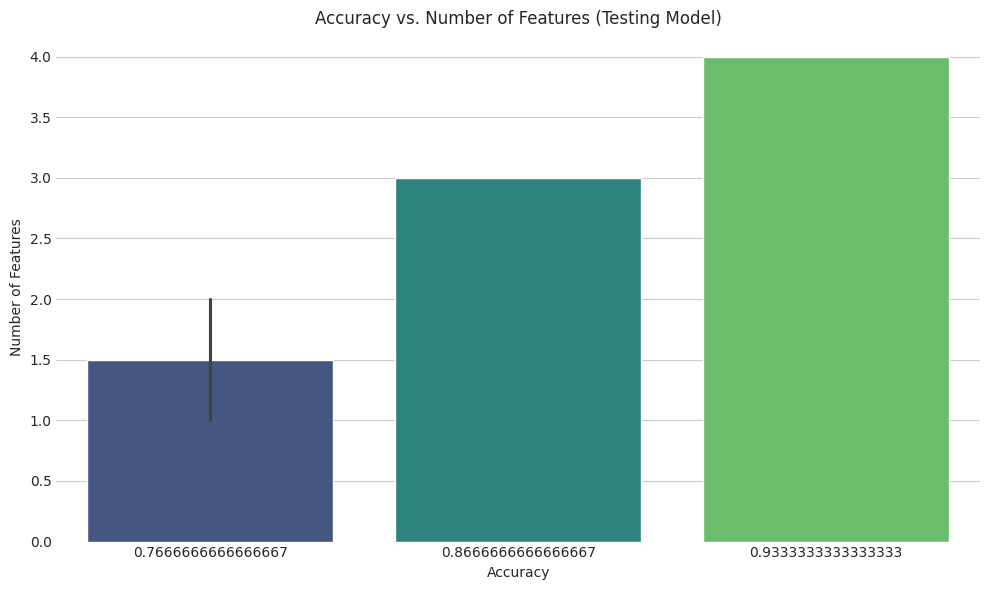

In [ ]:
X = read_data.drop('species', axis=1)
y = read_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features_list = []
accuracies = []

for num_features in range(1, len(X.columns)+1):
    selected_features = X.columns[:num_features]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    rf_selected = RandomForestClassifier(n_estimators=100, random_state=45)
    rf_selected.fit(X_train_selected, y_train)
    y_pred = rf_selected.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    num_features_list.append(num_features)
    accuracies.append(accuracy)

data = pd.DataFrame({'Number of Features': num_features_list, 'Accuracy': accuracies})

data_sorted = data.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Set the plot style
sns.barplot(x='Accuracy', y='Number of Features', data=data_sorted, palette='viridis')
plt.title('Accuracy vs. Number of Features (Testing Model)')
plt.xlabel('Accuracy')
plt.ylabel('Number of Features')
plt.tight_layout()
plt.show()


**TEST METRICS**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = read_data.drop('species', axis=1)
y = read_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9666666666666667

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


Confusion Matrix:

[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]


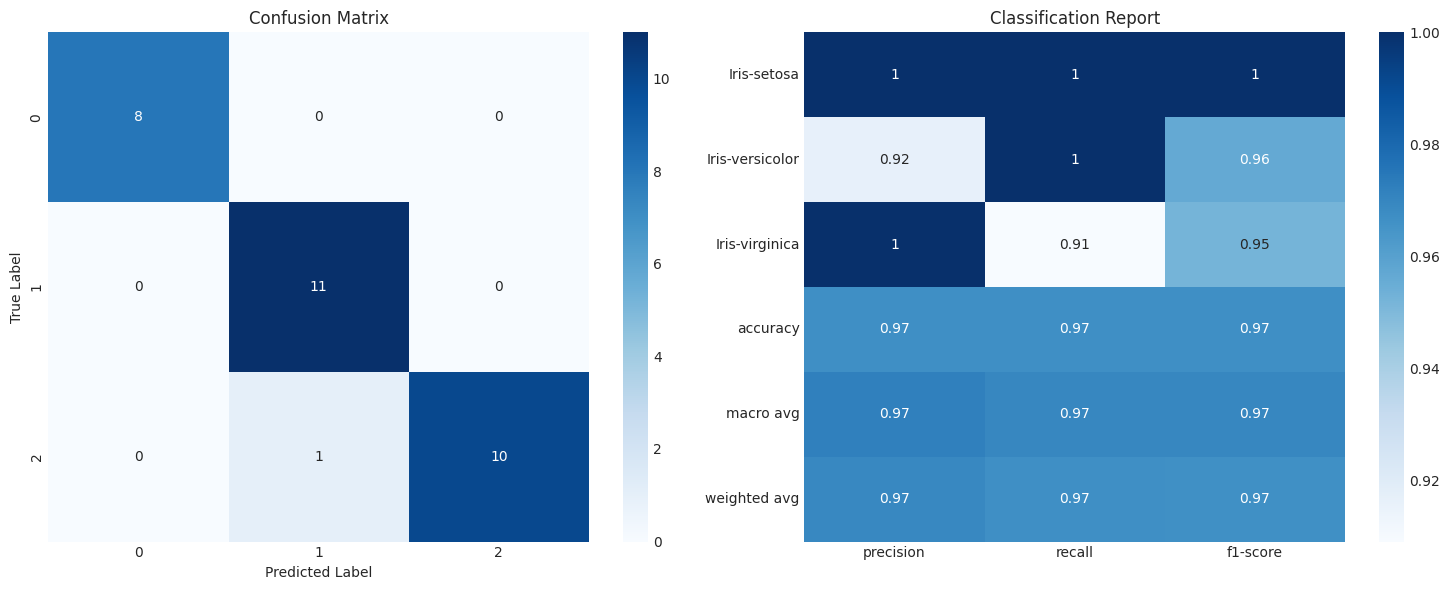

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axs[0])
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', ax=axs[1])
axs[1].set_title('Classification Report')

plt.tight_layout()
plt.show()


<ipython-input-74-30fd866ecdce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='f1-score', y=metrics_df.index, data=metrics_df, palette=colors)


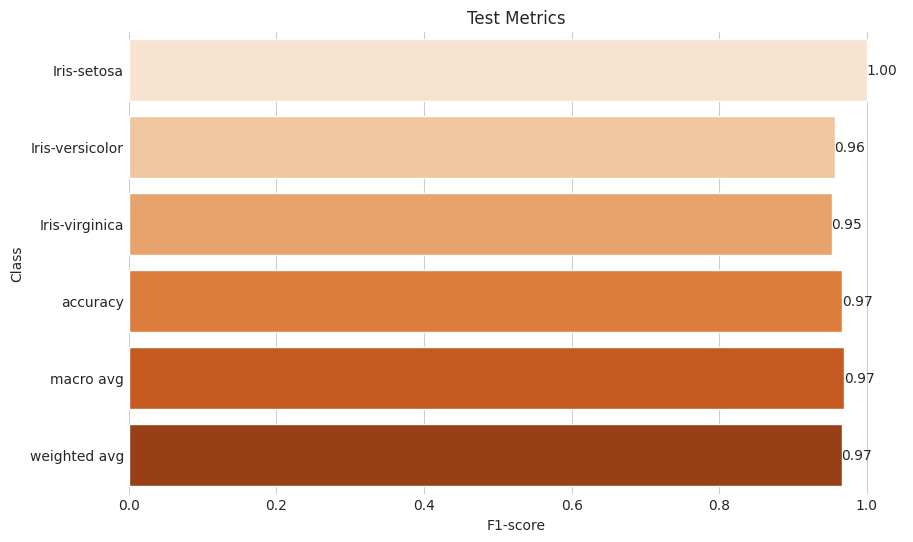

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
colors = sns.color_palette("Oranges", n_colors=len(metrics_df.index))  # Choose warm color palette
ax = sns.barplot(x='f1-score', y=metrics_df.index, data=metrics_df, palette=colors)
plt.title('Test Metrics')
plt.xlabel('F1-score')
plt.ylabel('Class')
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.02, p.get_y() + p.get_height() / 2, '{:.2f}'.format(width), ha='center', va='center')
plt.show()


# MODEL ACCURACY

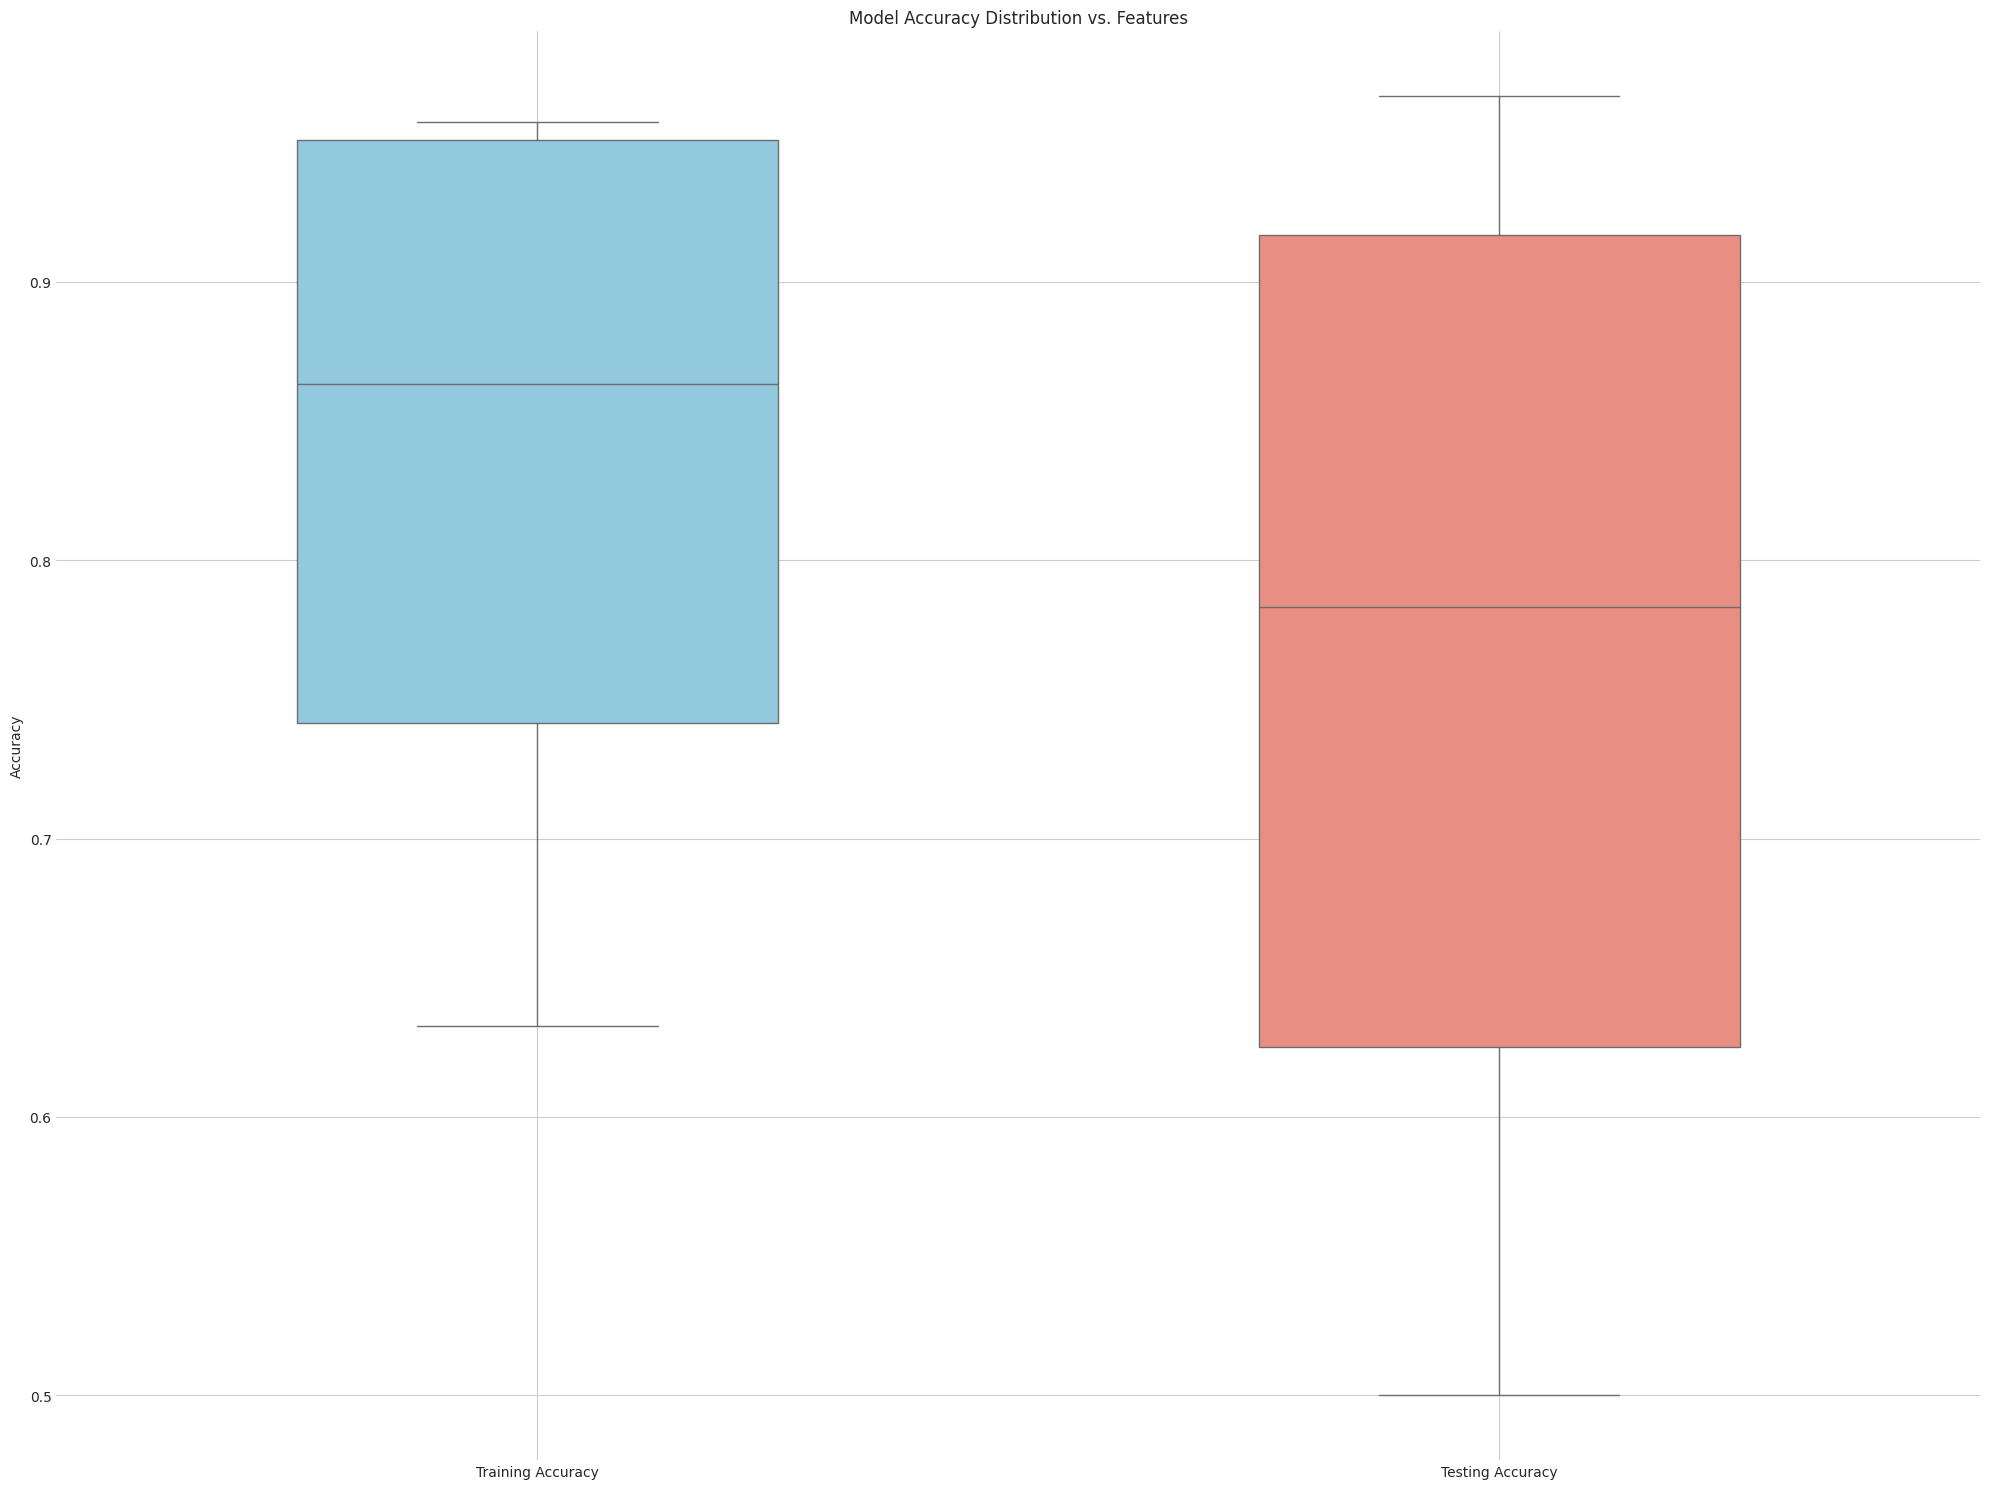

In [ ]:
train_accuracies = []
test_accuracies = []

feature_names = X_train.columns

for feature in feature_names:
    X_train_selected = X_train[[feature]]
    X_test_selected = X_test[[feature]]
    rf_selected = RandomForestClassifier(n_estimators=100, random_state=45)
    rf_selected.fit(X_train_selected, y_train)

    y_train_pred = rf_selected.predict(X_train_selected)
    y_test_pred = rf_selected.predict(X_test_selected)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

custom_palette = ['skyblue', 'salmon']

plt.figure(figsize=(20, 15))
sns.boxplot(data=[train_accuracies, test_accuracies], palette=custom_palette, width=0.5)
plt.title('Model Accuracy Distribution vs. Features')
plt.xticks([0, 1], ['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()
